In [2]:
using JLD, PyPlot

In [29]:
archivo="JLDForkCSDExacto/LFP_Promedio_est_bic9.jld"

"JLDForkCSDExacto/LFP_Promedio_est_bic9.jld"

In [30]:
Arxivo=load(archivo)

Dict{ByteString,Any} with 10 entries:
  "Canalesrespuesta" => Set([[29,34],[33,57],[25,39],[20,28],[33,56],[30,48],[2…
  "KTT_KInv"         => 4045x4045 Array{Float64,2}:…
  "freq"             => 17.85550205219098
  "latencia"         => 27
  "kCSDCorrecta"     => 64x64x1163 Array{Float64,3}:…
  "retrazo"          => 90
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "LFPSaturados"     => 64x64x1163 Array{Float64,3}:…
  "final"            => 1072
  "CanalesSaturados" => Set([[11,63],[19,60],[36,31],[51,44],[58,6],[38,61],[19…

In [31]:
CSD=Arxivo["kCSDCorrecta"];

In [32]:
listonga=(135,139,139)   

(135,139,139)

In [33]:
freq=Arxivo["freq"]
retrazo=Arxivo["retrazo"]

90

In [34]:
Arxivo["Nota"]

"Usamos las siguientes B y BT para obtener las Ks: BceroDura-r-0.25.dat y BtildeceroDura-r-0.25.dat"

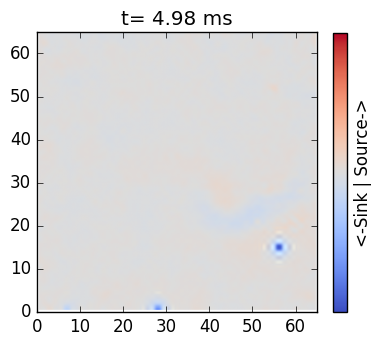

In [35]:
t=179
ion()
limites=25
figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    tiempo=round((t-retrazo)/freq,2)
title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="sinc",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")

In [36]:
ioff()
limites=25
for t=1:1000
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    tiempo=round((t-retrazo)/freq,2)
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="sinc",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")
    savefig("CSD_bic_v9_$t.png",dpi=90)
    close(figura)
end
PyPlot.close_figs()